<a href="https://colab.research.google.com/github/oailnivek/ML100-Days/blob/master/homework/Day_070-Keras_Mnist_MLP_h256_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
#建立模型
model = Sequential()

model.add(
    Dense(
        units=256,
        input_dim=784,
        kernel_initializer='normal',
        activation='relu'
    )
)

model.add(
    Dense(
        units=256,
        input_dim=784,
        kernel_initializer='normal',
        activation='relu'
    )
)

model.add(
    Dense(
        units=10,
        kernel_initializer='normal',
        activation='softmax'
    )
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [43]:
train_history = model.fit(
    x=x_Train_normalize,
    y=y_Train_OneHot,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 169us/step - loss: 0.0193 - acc: 0.9943 - val_loss: 0.1078 - val_acc: 0.9766
Epoch 2/10
48000/48000 [==============================] - 8s 165us/step - loss: 0.0147 - acc: 0.9959 - val_loss: 0.1333 - val_acc: 0.9731
Epoch 3/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0141 - acc: 0.9953 - val_loss: 0.1271 - val_acc: 0.9765
Epoch 4/10
48000/48000 [==============================] - 9s 196us/step - loss: 0.0125 - acc: 0.9962 - val_loss: 0.1237 - val_acc: 0.9782
Epoch 5/10
48000/48000 [==============================] - 9s 180us/step - loss: 0.0107 - acc: 0.9965 - val_loss: 0.1239 - val_acc: 0.9772
Epoch 6/10
48000/48000 [==============================] - 9s 181us/step - loss: 0.0162 - acc: 0.9954 - val_loss: 0.1318 - val_acc: 0.9774
Epoch 7/10
48000/48000 [==============================] - 9s 184us/step - loss: 0.0120 - acc: 0.9966 - val_loss: 0.1203 - 

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

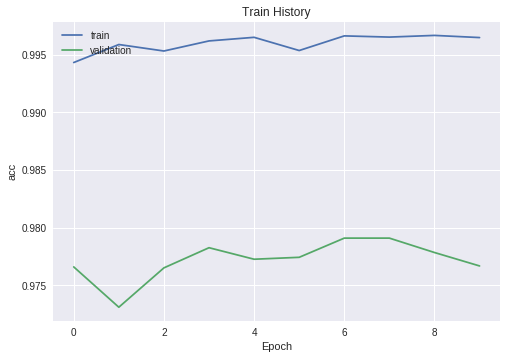

In [45]:
show_train_history(train_history, 'acc', 'val_acc')

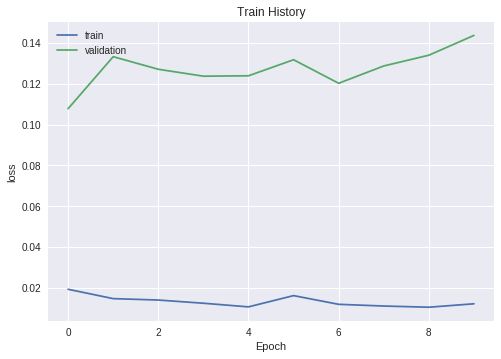

In [46]:
show_train_history(train_history, 'loss', 'val_loss')

# 評估模型準確率

In [47]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 56us/step

accuracy= 0.9786
